In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
X=df.iloc[:,1:]
y=df['total_bill']

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [5]:
## Numeric Pipepline
numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

In [6]:
from sklearn import set_config
set_config(display='diagram')
numeric_preprocessor

Pipeline(steps=[('imputation_mean', SimpleImputer()),
                ('scaler', StandardScaler())])

In [7]:
# Categorical Pipeline
categorical_preprocessor = Pipeline(
    steps=[
        ("imputation_constant", SimpleImputer(fill_value="missing", strategy="constant")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

categorical_preprocessor

Pipeline(steps=[('imputation_constant',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [8]:
## Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_preprocessor, ['sex', 'smoker', 'day', 'time']),
        ('numerical', numeric_preprocessor, ['tip', 'size'])
    ]
)

preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputation_constant',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['sex', 'smoker', 'day', 'time']),
                                ('numerical',
                                 Pipeline(steps=[('imputation_mean',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['tip', 'size'])])

In [9]:
pipe = Pipeline(
    steps=[("Preprocessor", preprocessor), ("Regressor", RandomForestRegressor(random_state=42))]
)

pipe

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'smoker', 'day',
                                                   'time']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tip', 'size'])])),
                ('Regressor', RandomForestRegressor(random_state=42))])

In [10]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'smoker', 'day',
                                                   'time']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tip', 'size'])])),
                ('Regressor', RandomForestRegressor(random_state=42))])

In [11]:
y_pred = pipe.predict(X_test)
y_pred

array([17.7144    , 13.48302381, 20.2178    , 28.35618   , 12.76295083,
       14.21147667, 15.7209    , 15.41625   , 20.3753    , 20.23255333,
       19.36196667, 13.7416    , 10.45792571, 14.21147667, 11.28893   ,
       14.4237    , 21.9384    , 19.2931    , 14.2614    , 27.3415    ,
       20.1986    , 21.1103    , 19.7903    , 13.7416    , 22.8969    ,
       15.99325   , 13.50206667, 23.1378    , 20.2178    , 23.8249    ,
       22.1232    , 13.7053    , 19.5674    , 19.2089    , 20.9247    ,
       21.3506    , 13.53135   , 29.1257    , 18.57716667, 14.335     ,
       13.5754    , 11.97916631, 16.32942   , 14.6429    , 14.470735  ,
       10.50275   , 19.14365833, 18.3536    , 11.2734    ])

In [22]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r_squared = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (Coefficient of Determination): {r_squared:.2f}')


Mean Absolute Error (MAE): 4.65
Mean Squared Error (MSE): 42.65
Root Mean Squared Error (RMSE): 6.53
R-squared (Coefficient of Determination): 0.50


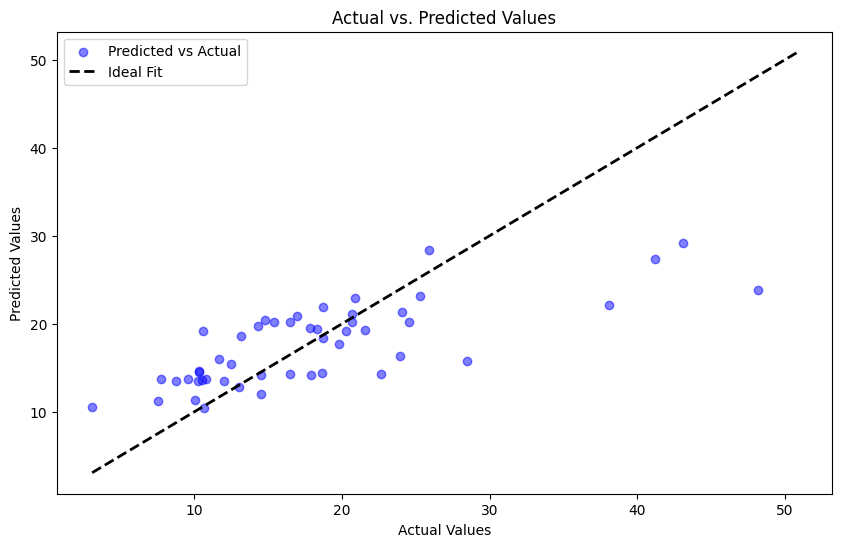

In [13]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


# **Above we have used RandomForestRegressor without any parameters, what about if we want to use parameters for our Regressor? and further wants to apply HyperParameter Tuning?**

# **HyperParameter Tuning**

In [14]:
parameters = {
    'Regressor__n_estimators': [100, 200, 300, 400, 500, 600],
    'Regressor__max_features': ['auto', 'sqrt', 'log2'],
    'Regressor__max_depth': [1,2,3,4,5,6,7,8,9]
}

In [15]:
grid_search = GridSearchCV(pipe, param_grid = parameters, cv=5, n_jobs = -1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('imputation_constant',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'day',
                                                                          'time']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('imputation_mean',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['tip',
                                                                          'size'])])),
                                       ('Regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'Regressor__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'Regressor__max_features': ['auto', 'sqrt', 'log2'],
                         'Regressor__n_estimators': [100, 200, 300, 400, 500,
                                                     600]},
             verbose=1)

In [16]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'Regressor__max_depth': 5, 'Regressor__max_features': 'sqrt', 'Regressor__n_estimators': 400}


In [17]:
# Using the best estimator directly
best_pipe = grid_search.best_estimator_
y_pred = best_pipe.predict(X_test)

In [18]:
y_pred

array([18.11288513, 15.5715762 , 20.88110641, 30.30910492, 13.90337003,
       20.27286653, 16.78192566, 15.06962799, 19.55161217, 17.32989266,
       18.23069976, 15.60459425, 12.43632036, 20.27286653, 12.11265511,
       15.63029741, 20.94581681, 19.88469986, 16.70086657, 28.51986675,
       22.65842938, 21.18317191, 19.94245053, 15.60459425, 23.49242851,
       16.02227955, 15.29466444, 22.13581641, 20.88110641, 26.29703215,
       22.43565878, 17.18359806, 21.83300493, 21.30823109, 21.43059343,
       23.16276304, 17.83429059, 25.57055859, 16.34114974, 18.00518451,
       15.42910856, 12.68317451, 16.05599626, 18.3693314 , 15.65055285,
       14.38468858, 16.58225306, 19.59199276, 13.38720904])

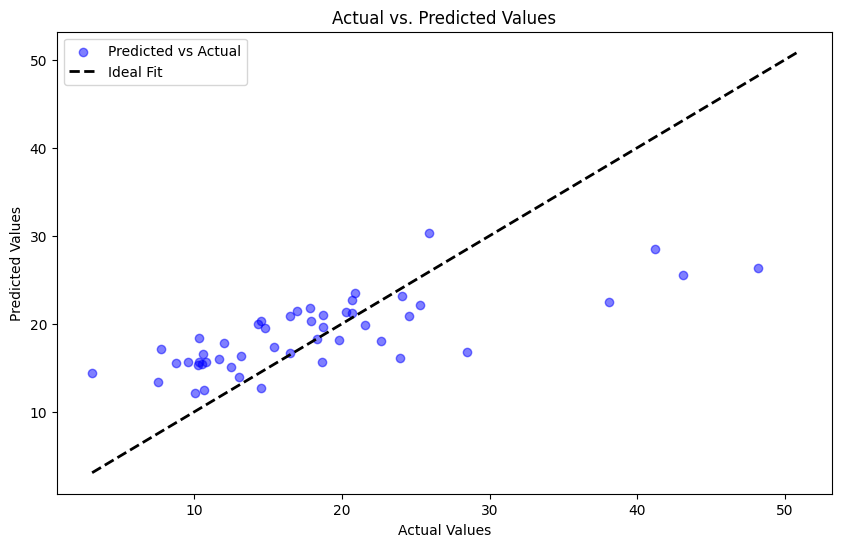

In [19]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


In [20]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r_squared = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (Coefficient of Determination): {r_squared:.2f}')


Mean Absolute Error (MAE): 5.09
Mean Squared Error (MSE): 46.06
Root Mean Squared Error (RMSE): 6.79
R-squared (Coefficient of Determination): 0.46


Performance without Hyperparameter Tuning:
Mean Absolute Error (MAE): 4.81
Mean Squared Error (MSE): 46.55
Root Mean Squared Error (RMSE): 6.82
R-squared: 0.45
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:  {'SVR__C': 10, 'SVR__gamma': 'scale', 'SVR__kernel': 'linear'}
Performance with Hyperparameter Tuning:
Mean Absolute Error (MAE): 4.05
Mean Squared Error (MSE): 28.83
Root Mean Squared Error (RMSE): 5.37
R-squared: 0.66


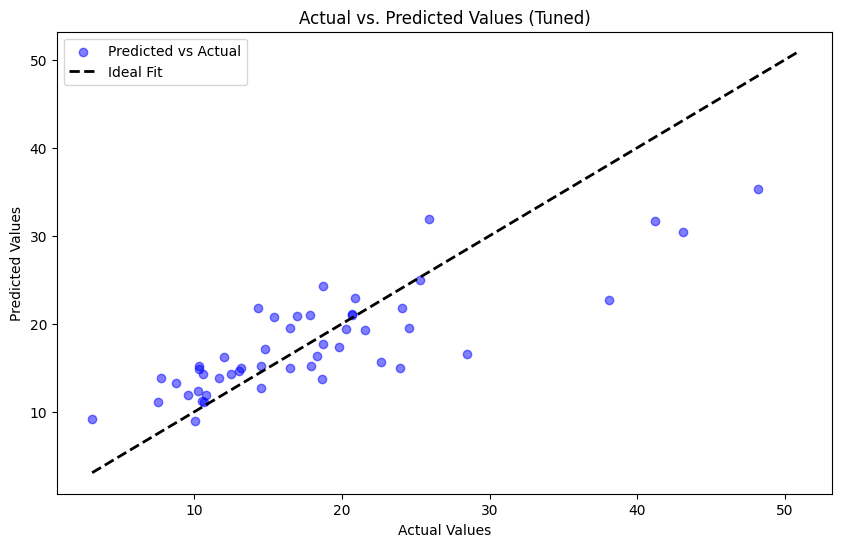

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = sns.load_dataset('tips')

# Split data
X = df.drop('total_bill', axis=1)
y = df['total_bill']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
numeric_preprocessor = Pipeline([
    ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_preprocessor = Pipeline([
    ("imputation_constant", SimpleImputer(fill_value="missing", strategy="constant")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, ['sex', 'smoker', 'day', 'time']),
    ('numerical', numeric_preprocessor, ['tip', 'size'])
])

# Pipeline creation
svr_pipe = Pipeline([
    ("Preprocessor", preprocessor),
    ("SVR", SVR())
])

# Fit the model without hyperparameter tuning
svr_pipe.fit(X_train, y_train)
y_pred = svr_pipe.predict(X_test)

# Evaluation without tuning
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("Performance without Hyperparameter Tuning:")
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared: {r_squared:.2f}')

# Hyperparameter Tuning
parameters = {
    'SVR__C': [0.1, 1, 10],
    'SVR__gamma': ['scale', 'auto'],
    'SVR__kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(svr_pipe, param_grid=parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

# Using the best estimator directly
best_svr_pipe = grid_search.best_estimator_
y_pred_tuned = best_svr_pipe.predict(X_test)

# Evaluation with tuning
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r_squared_tuned = r2_score(y_test, y_pred_tuned)

print("Performance with Hyperparameter Tuning:")
print(f'Mean Absolute Error (MAE): {mae_tuned:.2f}')
print(f'Mean Squared Error (MSE): {mse_tuned:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_tuned:.2f}')
print(f'R-squared: {r_squared_tuned:.2f}')

# Plotting results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tuned, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Tuned)')
plt.legend()
plt.show()
